In [3]:
from returns import *

In [ ]:
print(Return.__doc__)

## Return
Return is a fast¹, easy to use² running average object, including windowed
averages with exponential convergence, and recency-weighted sums.

__________________________________________________________________________

¹O(n) time complexity and O(1) memory complexity with respect to t (steps)

²No special APIs: only the + operator is needed

### Init arguments
```python
avg: float = 0.0 # running avg
n: int = 0       # number of items
α: float = 1.0   # recency weight for sum and avg_r
Σ: float = 0.0   # sum accumulation
t: int = 0       # number of visits / updates
```

### Non-init members
```python
avg_r: float      # exponential recency weighted average
avg_r_prev: float # avg_r at t - 1
avg_prev: float   # avg at t - 1
Σ_prev: float     # Σ at t - 1

# Note: avg_r with α = 1 - 4 / window_size (in terms of t) will converge to approximately
# the same point at the same time as a linear rolling window of that size.
```

### Example usage
```python
import numpy as np
import pandas as pd
import seaborn as sns
from returns import Return as R

# make a noisy sine wave
m, n = 4 * np.pi, 1_000
x = np.linspace(0, m, n)
y = np.sin(x)
noisy = y + np.random.random(n) - 0.5

# compute a recency average using the Return class
a = 1 - 1 / m
r = R(α=a)
estimate = []
for sample in noisy:
    r += R(sample, n=1)
    estimate.append(r.avg_r)

df = pd.DataFrame({'x': x, 'y': y, 'noisy': noisy, 'estimate': estimate})
_ = sns.lineplot(data=df[['x', 'noisy', 'estimate']], lw=2)
_ = sns.lineplot(data=df[['x', 'y', 'estimate']], lw=2)
```

### Naming
The name Return was inspired by a Markov Decision Process in reinforcement learning.
In an MDP, the return of an action on an environment must be averaged or accumulated in
different ways, depending on the algorithm.

### Comparison of averages

This example shows how the recency average approximates the noisy step similar to a rolling window of 1/4 the period size, while smoother and cheaper to compute.

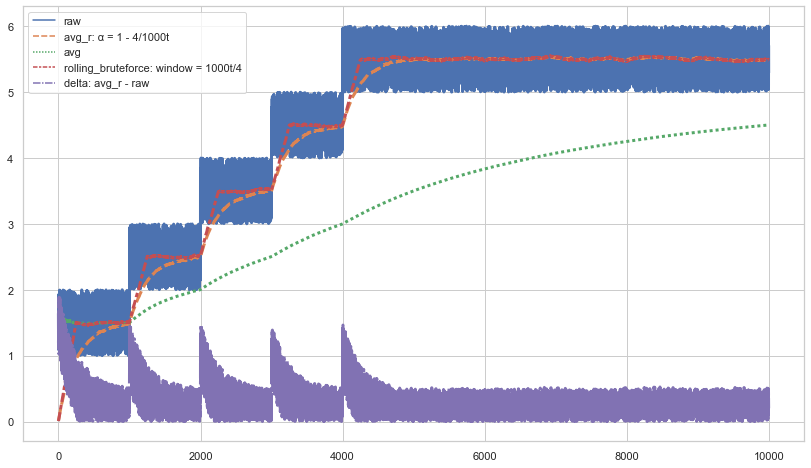

In [4]:
return_example()

### Estimating the signal in the noise

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from returns import Return as R

# make a noisy sine wave
m, n = 4 * np.pi, 1_000
x = np.linspace(0, m, n)
y = np.sin(x)
noisy = y + np.random.random(n) - 0.5

# compute a recency average using the Return class
a = 1 - 1 / m
r = R(α=a)
estimate = []
for sample in noisy:
    r += R(sample, n=1)
    estimate.append(r.avg_r)

df = pd.DataFrame({'x': x, 'y': y, 'noisy': noisy, 'estimate': estimate})

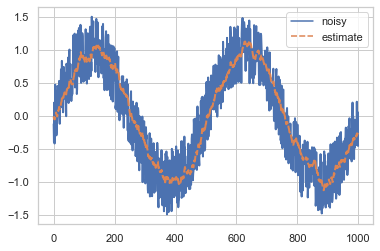

In [22]:
_ = sns.lineplot(data=df[['x', 'noisy', 'estimate']], lw=2)

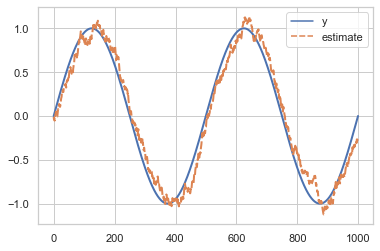

In [23]:
_ = sns.lineplot(data=df[['x', 'y', 'estimate']], lw=2)